
# <center>Project 1</center>

Sandeep Varma Uppalapati

#1. Introduction

The dataset of Heart Disease is taken from [UCI Data repository](https://archive.ics.uci.edu/dataset/45/heart+disease) which contains both numerical and categorical features, allowing for a comprehensive exploration of potential correlations and patterns related to heart disease. Age and sex provide demographic information, while blood pressure and cholesterol levels are crucial indicators of heart health. The presence of blood pressure exceeding 120 and the number of major vessels colored by fluoroscopy offer additional medical insights, and the target variable serves as the primary outcome of interest, indicating whether heart disease can be cured.

**Research Questions**

1. What is the distribution of age and gender in the dataset, and are there any noticeable trends or differences in heart disease prevalence within these groups?

2. What is the distribution of the number of major vessels colored by fluoroscopy, and is there a clear association between this variable and the presence of heart disease?

3. Does having blood pressure greater than 120 have any observable impact on the curability of heart disease, and how common is this condition among individuals?

4. Can we identify any significant correlations or associations between variables (e.g., age, cholesterol, blood pressure) and the variable indicating the curability of heart disease?

#2. Data Summary

Data set is taken from UIC Data repository.

I am considering the subset of the dataset that is needed to answer my research questions.Data set contains 303 records and 7 columns.

1. age : Age
2. sex : Sex
3. trestbps	: resting blood pressure (on admission to the hospital)	mm/Hg
4. chol : serum cholestoral	mg/dl
5. fbs : fasting blood sugar > 120 mg/dl
6. ca : number of major vessels (0-3) colored by flourosopy
7. num : diagnosis of heart disease. It is integer valued from 0 (no presence) to 4

In [195]:
#this is the UCI datset module for datset
!pip install ucimlrepo

In [196]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
#fetching the data from the UCI repositiory databse using their respective python modules and libraries
from ucimlrepo import fetch_ucirepo
# fetch dataset
heart_disease = fetch_ucirepo(id=45)
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
# metadata
print(heart_disease.metadata)
# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

In [198]:
heart_disease.data.features.to_csv("heartdisease.csv")

In [199]:
# fetching the datset as a dataframe
heart_disease.data.features.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [200]:
#this is the target variable available as a separate attribute
heart_disease.data.targets.head()

,num
0,0
1,2
2,1
3,0
4,0


In [201]:
#lets merge the data into a single data frame which contains both features and the target variable
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [202]:
#data types of the data attributes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Data contains integer and float valued attributes

In [203]:
df.shape

(303, 14)

Data set has 303 observations and 14 attributes asshown above

#3. Exploratory Data Analysis (EDA)

To advance in this research section, we will begin by performing a comprehensive summary statistics analysis for each of the variables, with a focus on detecting any potential outliers or missing values that might exert an impact on our findings. Subsequently, we will supplement our analysis with visual representations for each attribute using both Matplotlib and Seaborn.

In [204]:
# I will be droping some of the columns that were not used for the analysis
df.drop(['cp','restecg','thalach','exang','oldpeak','slope','thal'],axis=1,inplace=True)

In [205]:
#Now i have data set with required columns
df

,age,sex,trestbps,chol,fbs,ca,num
0,63,1,145,233,1,0.0,0
1,67,1,160,286,0,3.0,2
2,67,1,120,229,0,2.0,1
3,37,1,130,250,0,0.0,0
4,41,0,130,204,0,0.0,0
...,...,...,...,...,...,...,...
298,45,1,110,264,0,0.0,1
299,68,1,144,193,1,2.0,2
300,57,1,130,131,0,1.0,3
301,57,0,130,236,0,1.0,1


With the data successfully imported and irrelevant attributes removed from the dataset, our next essential step is to conduct a thorough inspection for any missing values within the dataset. Recognizing and appropriately addressing these null values is of paramount importance, as they can significantly influence the reliability and trustworthiness of our research findings.

In [206]:
#lets check for missing values in the data set
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
ca          4
num         0
dtype: int64

In [207]:
#we will check the statistical sumamry of the dataset
df.describe()

,age,sex,trestbps,chol,fbs,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.672241,0.937294
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.937438,1.228536
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,1.000000,2.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,3.000000,4.000000


describe() method gives the all summary statistics like mean, max, min stadard deviation,frequecy and the four quartile range data distribution which helps to understand the data distribution of the dataset

Now I will deep diving into analysis with each and every attribute

In [208]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

The average age in the data set is 54 years and minimum age is 29 and the maximum age is 77years.

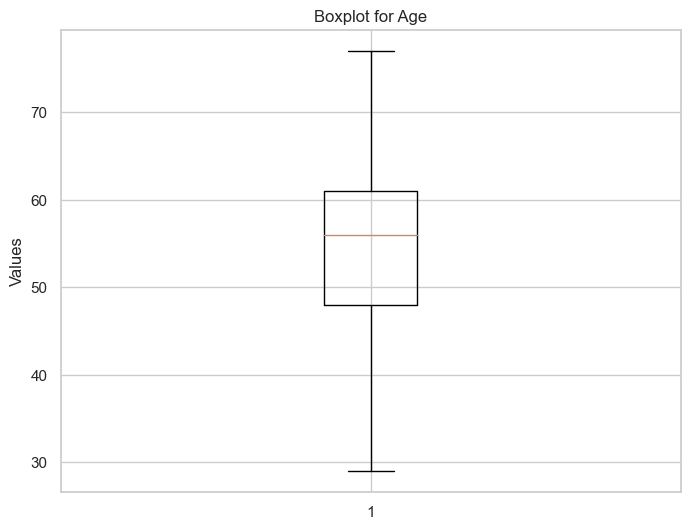

In [209]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.title('Boxplot for ' + 'Age')
plt.ylabel('Values')
plt.show()

From the boxplot we can observe how the data is distributed  and can come to know the different quartile ramges from the boxplot for a data.

In [210]:
#here as sex is a categorical column we wil convert it into a string column so that it will not consider as a numerical column
df['sex'] = df['sex'].astype(str)
df['sex'].describe()

count     303
unique      2
top         1
freq      206
Name: sex, dtype: object

Data contains total 303 records with two uique genders namely male and female.Here 1 represents male and 0 represents female.

In [211]:
df['trestbps'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

For resting blodd pressure on admission to the hopsital the average blood pressure is 131 mm/Hg. Maximum and Minimum blood pressure are 200 mm/Hg and 94 mm/Hg respectively

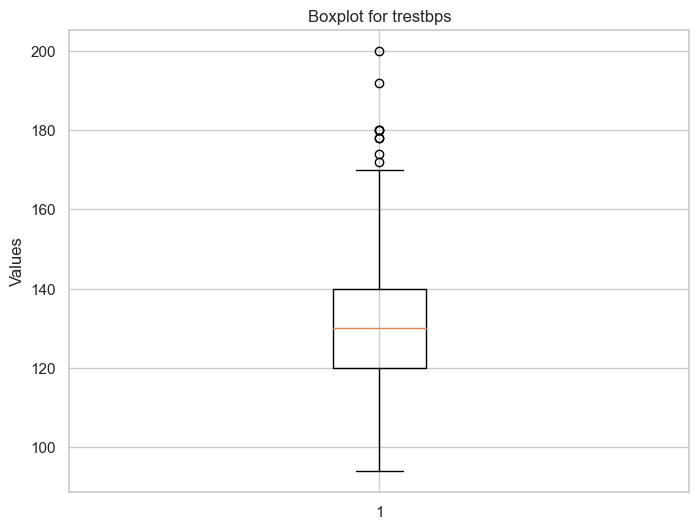

In [212]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['trestbps'])
plt.title('Boxplot for ' + 'trestbps')
plt.ylabel('Values')
plt.show()

From the above boxplot I can see that there were few outliers in the data of this attribute

In [213]:
df['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

The average cholestrol of a persons here is around 246.69 mg/dl and the maximum being the 564 mg/dl and minimum is 126 mg/dl

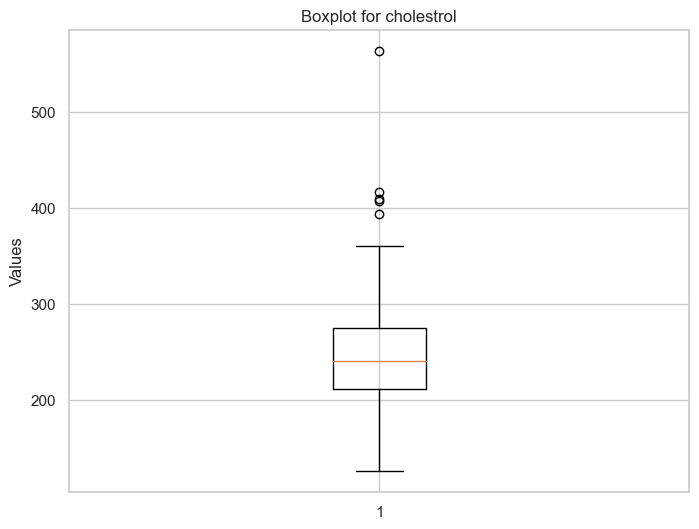

In [214]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['chol'])
plt.title('Boxplot for ' + 'cholestrol')
plt.ylabel('Values')
plt.show()

In this column also there are few outliers in the data that is around 5 outlier can be found as per the boxplot

In [215]:
df['fbs'].astype(str).describe()

count     303
unique      2
top         0
freq      258
Name: fbs, dtype: object

fbs represents the fasting blood sugar. 1 represent the that fasting blodd sugar level is >120 mg/dl and 0 represent less than 120 mg/dl

In [216]:
df['ca'].describe()

count    299.000000
mean       0.672241
std        0.937438
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

ca attribure represnts the number of major vessels (0-3) colored by flourosopy. Here the meximum vessels can be only upto 3 and the on average we can consider it as 1 vessel being colored by flourosopy.

In [217]:
df['num'].astype(str).describe()
#num is target variable indicating disease presence (values 1,2,3,4) from absence (value 0).

count     303
unique      5
top         0
freq      164
Name: num, dtype: object

Ther are 5 unique different types of values but as per the data dictionary given by the UCI 0 represnets the absence and other value represnet the present of the disease

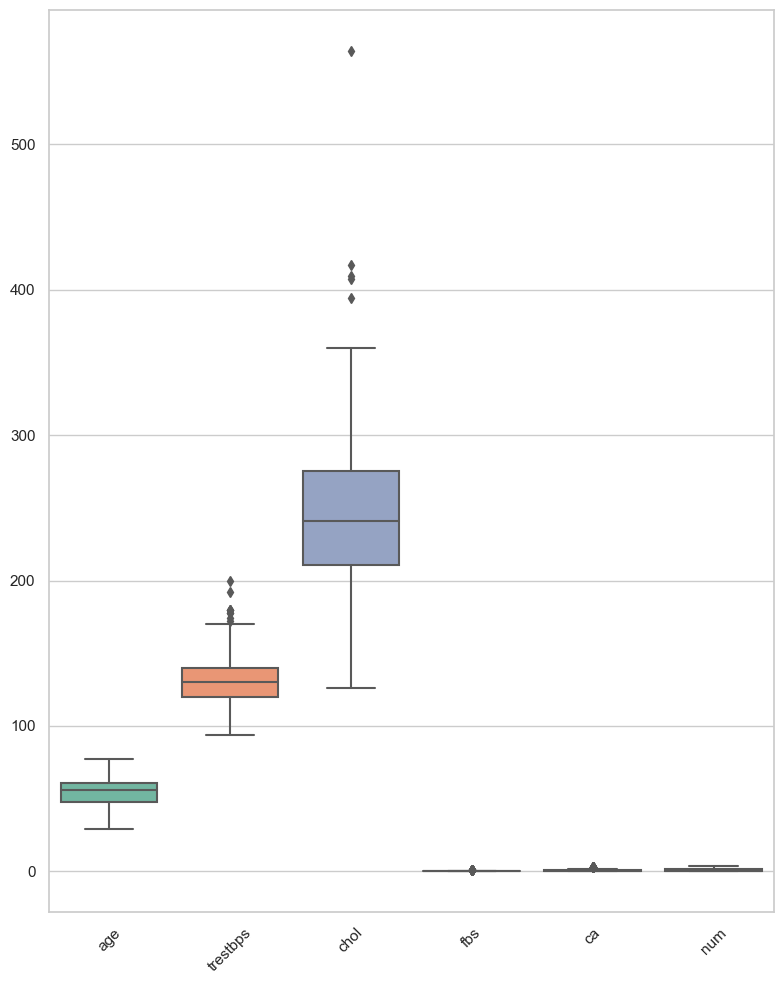

In [218]:
#boxplot for all numerical columns
plt.figure(figsize=(8, 10))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

So we have data outliers in two columns namely trestbps and chol

### Age

In [219]:
# Defining the age group boundaries
age_bins = [0, 17, 44, 64, float('inf')]  # age ranges for each group
# Defining the corresponding age group labels
age_labels = ['Under 18 years', '18–44 years', '45–64 years', '65 and over']
# Creating a new column 'age_group' based on age values
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


In [220]:
df.head()

,age,sex,trestbps,chol,fbs,ca,num,age_group
0,63,1,145,233,1,0.0,0,45–64 years
1,67,1,160,286,0,3.0,2,65 and over
2,67,1,120,229,0,2.0,1,65 and over
3,37,1,130,250,0,0.0,0,18–44 years
4,41,0,130,204,0,0.0,0,18–44 years


As we divided the data into age groups it would make easier to analyse data based on age

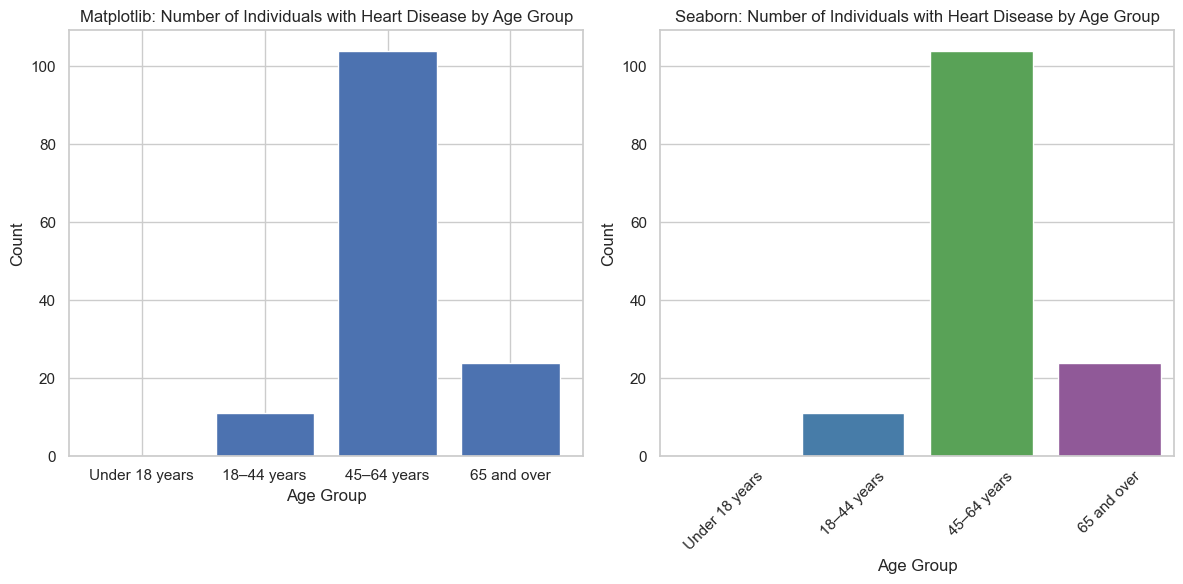

In [221]:
# Filter the data to include only individuals with heart disease
heart_disease_df = df[df['num'] != 0]

# Define the age group labels
age_group_labels = ['Under 18 years', '18–44 years', '45–64 years', '65 and over']

# Create subplots for Matplotlib and Seaborn side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Using Matplotlib
ax1.bar(age_group_labels, heart_disease_df.groupby('age_group').size())
ax1.set_title('Matplotlib: Number of Individuals with Heart Disease by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')

# Using Seaborn
sns.countplot(data=heart_disease_df, x='age_group', order=age_group_labels, palette='Set1', ax=ax2)
ax2.set_title('Seaborn: Number of Individuals with Heart Disease by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for Seaborn plot

plt.tight_layout()
plt.show()

### Observations
As per the barplot, it shows that there more population falls in age group of 45 - 64 years followed by 65 years and above.

### Sex/Gender

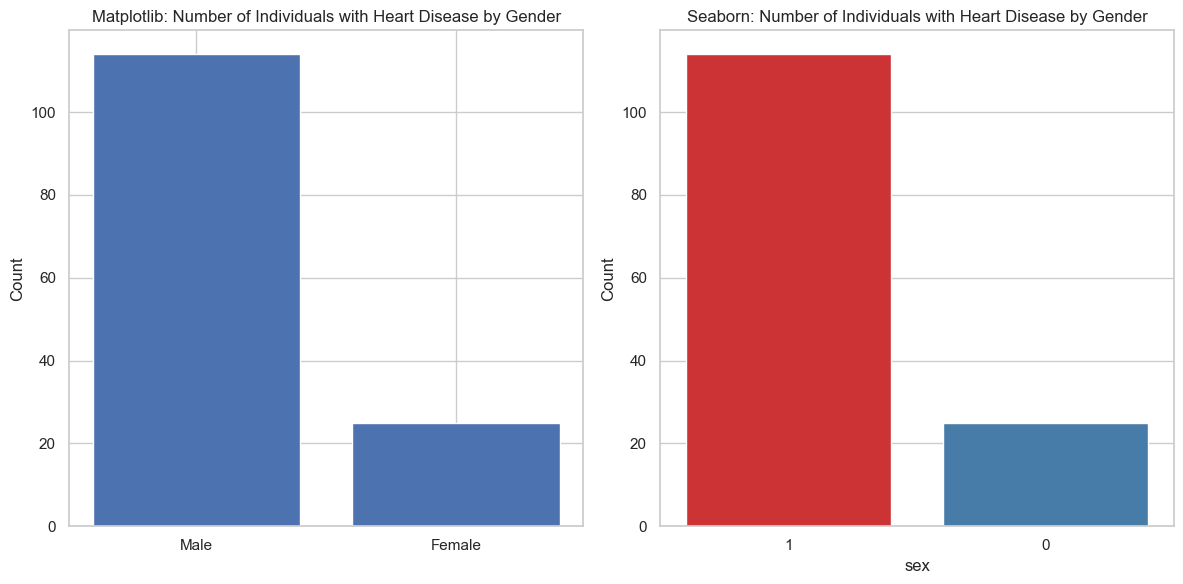

In [222]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Using Matplotlib
ax1.bar(['Male', 'Female'], heart_disease_df['sex'].value_counts())
ax1.set_title('Matplotlib: Number of Individuals with Heart Disease by Gender')
ax1.set_ylabel('Count')

# Using Seaborn
sns.countplot(data=heart_disease_df, x='sex', palette='Set1', ax=ax2)
ax2.set_title('Seaborn: Number of Individuals with Heart Disease by Gender')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()





#### Findings:
Surprisingly the heart diseases were more prevalent among the Males compared to the Females.

### fbs : Fasting blood sugar > 120 mg/dl

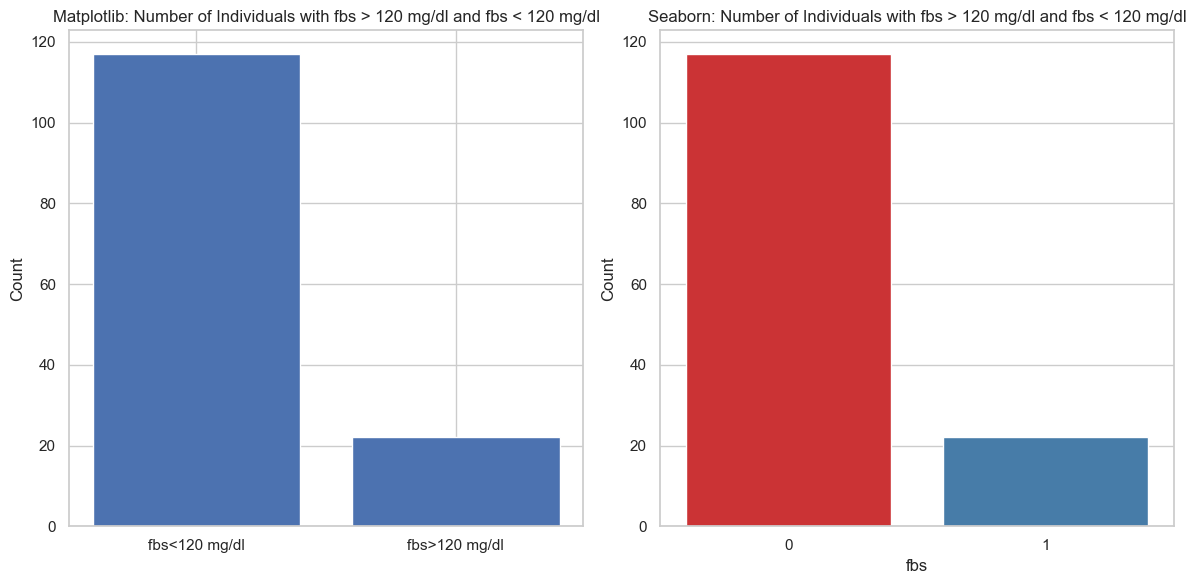

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Using Matplotlib
ax1.bar(['fbs<120 mg/dl', 'fbs>120 mg/dl'], heart_disease_df['fbs'].value_counts())
ax1.set_title('Matplotlib: Number of Individuals with fbs > 120 mg/dl and fbs < 120 mg/dl')
ax1.set_ylabel('Count')

# Using Seaborn
sns.countplot(data=heart_disease_df, x='fbs', palette='Set1', ax=ax2)
ax2.set_title('Seaborn: Number of Individuals with fbs > 120 mg/dl and fbs < 120 mg/dl')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()





#### Findings:
fbs represents fastimng blodd sugar level.if fbs >120 mg/dl it shows as 1 else 1 .From the baove plots it shows that more people has fbs <120 mg/dl

### Average cholestrol by each group with heart disease

In [224]:
df.groupby('age_group').agg({'chol': ['mean', 'count']}).reset_index()

age_group        chol      
                         mean count
0  Under 18 years         NaN     0
1     18–44 years  229.659091    44
2     45–64 years  246.096154   208
3     65 and over  263.823529    51

#### Findings
from the above data, cholestrol is more in the age group of 5 and above and also the average cholestrol for that age group is around 263.82 mg/dl

### Average Blood Pressure by age group


In [225]:
df.groupby('age_group').agg({'trestbps': ['mean', 'count']}).reset_index()


age_group    trestbps      
                         mean count
0  Under 18 years         NaN     0
1     18–44 years  124.750000    44
2     45–64 years  131.639423   208
3     65 and over  137.882353    51

#### Findings:

The blood pressure is high inage group of 65 and over with an average blood pressure of 137 mm Hg

## Average Blood pressure and cholestrol by sex

In [226]:
df.groupby('sex').agg({'trestbps': ['mean'],'chol':['mean','count']}).reset_index()

sex    trestbps        chol      
             mean        mean count
0   0  133.340206  261.752577    97
1   1  130.912621  239.601942   206

####Findings:

In males the persons with average cholestrol of around 239 mg/dl and blood pressure of around 131 mm Hg are likely to het heart diseases and similarly in Females with blood pressure around 133 mm Hg and cholestrol of around 262 mg/dl are more likely to get heart diseases

#4.Inference
Now lest try to answer the research questions


###1.What is the distribution of age and gender in the dataset, and are there any noticeable trends or differences in heart disease prevalence within these groups?

In [227]:
# Group the data by 'age_group' and 'gender' and count the number of individuals with heart diseases for each group
heart_disease_count = heart_disease_df.groupby(['age_group', 'sex'])['num'].count().reset_index()
# Renaming columns for redability
heart_disease_count.rename(columns={'num': 'count'})



,age_group,sex,count
0,Under 18 years,0,0
1,Under 18 years,1,0
2,18–44 years,0,1
3,18–44 years,1,10
4,45–64 years,0,22
5,45–64 years,1,82
6,65 and over,0,2
7,65 and over,1,22


C:\Users\Sandeep Varma\AppData\Local\Temp\ipykernel_23716\4236377871.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=heart_disease_df, x='age_group', y='num', hue='sex', ci=None)


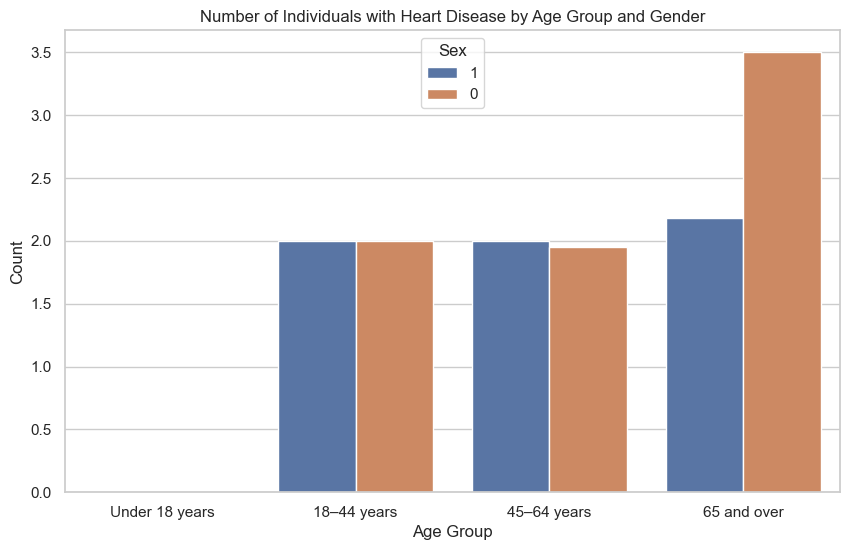

In [228]:
plt.figure(figsize=(10, 6))  # Adjusting the figure size as needed
sns.barplot(data=heart_disease_df, x='age_group', y='num', hue='sex', ci=None)
plt.title('Number of Individuals with Heart Disease by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

From the above reulst can say that more number of peope with heart diseases are falling in age group of 65 and over both males and females

###2.What is the distribution of the number of major vessels colored by fluoroscopy, and is there a clear association between this variable and the presence of heart disease?

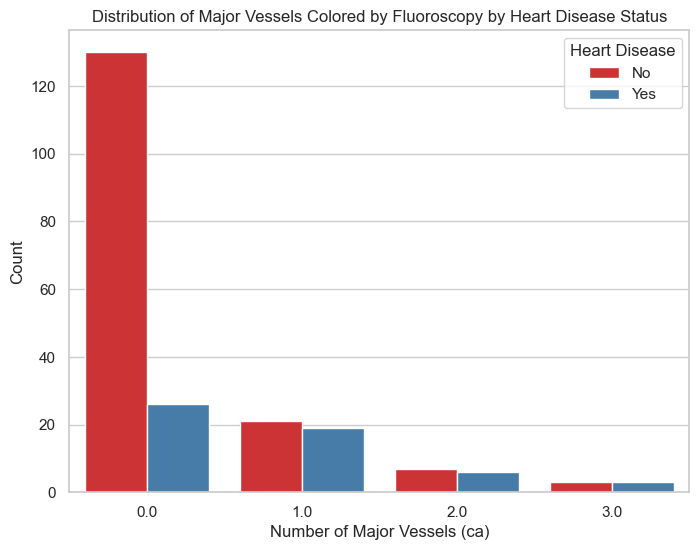

In [229]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ca', hue='num', palette='Set1', hue_order=[0, 1])
plt.title('Distribution of Major Vessels Colored by Fluoroscopy by Heart Disease Status')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

From the above reults it shows that more people has vessels not colored by flouroscopy in case of heart disease

###3.Does having blood pressure greater than 120 have any observable impact on the curability of heart disease, and how common is this condition among individuals?

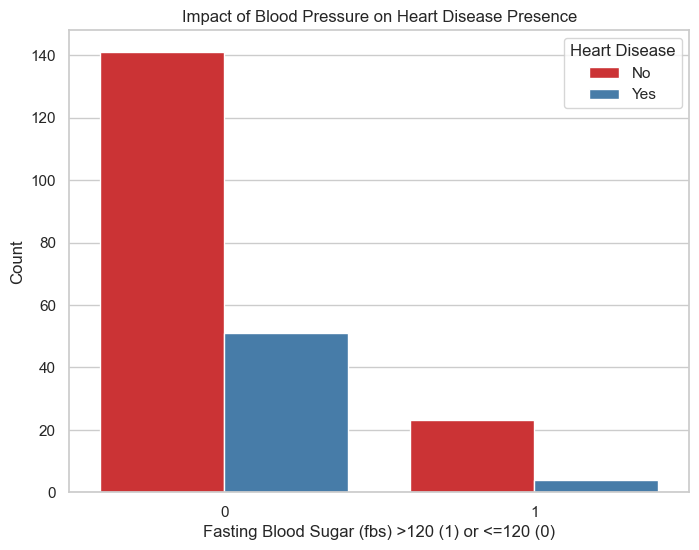

Percentage of individuals with high blood pressure (>120): 14.85%


In [230]:
# Create a countplot to visualize the impact of blood pressure on heart disease presence
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fbs', hue='num', palette='Set1', hue_order=[0, 1])
plt.title('Impact of Blood Pressure on Heart Disease Presence')
plt.xlabel('Fasting Blood Sugar (fbs) >120 (1) or <=120 (0)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.show()

# Calculate the percentage of individuals with high blood pressure (>120)
total_high_bp = df['fbs'].sum()
total_individuals = len(df)
percentage_high_bp = (total_high_bp / total_individuals) * 100

print(f"Percentage of individuals with high blood pressure (>120): {percentage_high_bp:.2f}%")

From the above data it is evident that a person with blood pressure > 120 has high likely to get heart diseases.

In [231]:
###4.Can we identify any significant correlations or associations between ca(no of vessels colored by floroscopy) and the variable indicating the curability of heart disease?

C:\Users\Sandeep Varma\AppData\Local\Temp\ipykernel_23716\1098941283.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


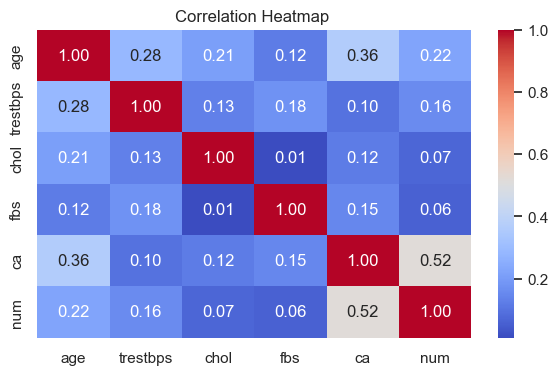

In [232]:
# Create a correlation matrix for all columns in the DataFrame df
correlation_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap ")
plt.show()

From the above correlation matrix visulaized using heatmap,
Age and Num has very less corelation so curing of heart disease migh leastly depend on the age.

But num is correlated with the ca which is number of vessles colored by floroscopy which means that this tratment can be a good treatment to the heart disease.

#5.Conclusion
I conclude that the population is predominantly distributed within the age group of 45-64 years, followed by those aged 65 and above. Notably, heart diseases appear to be more prevalent among males than females, emphasizing the role of gender as a potential risk factor for heart disease. Moreover, the majority of individuals in the dataset have fasting blood sugar levels below 120 mg/dL, indicating a lower incidence of high blood sugar. Cholesterol levels tend to be higher among those aged 65 and above, with an average cholesterol level of approximately 263.82 mg/dL in this age group. The dataset also suggests that high blood pressure is more common among individuals aged 65 and over, with an average blood pressure of 137 mm Hg in this group. Additionally, males with an average cholesterol level of around 239 mg/dL and blood pressure of about 131 mm Hg, as well as females with blood pressure around 133 mm Hg and cholesterol of approximately 262 mg/dL, appear to be more likely to develop heart diseases. The data further highlights that individuals with uncolored vessels by fluoroscopy are more commonly associated with heart disease. These insights underscore the importance of age, gender, blood sugar levels, cholesterol, and blood pressure as influential factors in the occurrence of heart diseases within the dataset.

#6.References:


    https://archive.ics.uci.edu/dataset/45/heart+disease
    
    https://pandas.pydata.org/docs/user_guide/groupby.html#aggregation
    
    https://sparkbyexamples.com/pandas/pandas-aggregate-functions-with-examples/

    https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python